In [1]:
import os
from PIL import Image

base_dir = ('D:\KULIAH\Skripsi\DATASET\Warung Botol')

In [2]:
# menentukan direktori
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')

In [3]:
# menentukan direktori isi folder training

PET_train_dir = os.path.join(train_dir, 'PET')
HDPE_train_dir = os.path.join(train_dir, 'HDPE')

print("Jumlah Data Train Tiap Kelas")
print('jumlah gambar train PET :', len(os.listdir(PET_train_dir)))
print('jumlah gambar train HDPE :', len(os.listdir(HDPE_train_dir)))

Jumlah Data Train Tiap Kelas
jumlah gambar train PET : 77
jumlah gambar train HDPE : 75


In [4]:
# menentukan direktori isi folder validasi
PET_val_dir = os.path.join(validation_dir, 'PET')
HDPE_val_dir = os.path.join(validation_dir, 'HDPE')

print("Jumlah Data Validasi Tiap Kelas")
print('jumlah gambar validasi PET :', len(os.listdir(PET_val_dir)))
print('jumlah gambar validasi HDPE :', len(os.listdir(HDPE_val_dir)))

Jumlah Data Validasi Tiap Kelas
jumlah gambar validasi PET : 18
jumlah gambar validasi HDPE : 13


In [5]:
# preprocessing

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale = 1/64,
                  rotation_range = 15,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                  rescale = 1/64,
                  rotation_range = 15,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.1
)
 

In [6]:
# target

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

Found 152 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [7]:
# model CNN

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu', input_shape = (500,500,3)),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation = 'relu'),
          tf.keras.layers.Dropout(0.5, seed = 128),
          tf.keras.layers.Dense(2,activation = 'sigmoid'),
])

In [8]:
# ringkasan model CNN

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 497, 497, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 165, 165, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 162, 162, 16)      4112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 16)        4112      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

In [9]:
# compile model

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [10]:
# model training
history = model.fit( 
            train_generator,
            steps_per_epoch = 5 ,
            epochs = 30,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1
)

# print(result)
print(history.history.keys())
print((history.history.values()))

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/flatten/Reshape' defined at (most recent call last):
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19112\327369660.py", line 2, in <module>
      history = model.fit(
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\flatten.py", line 96, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential/flatten/Reshape'
Input to reshape is a tensor with 1280 values, but the requested shape requires a multiple of 4624
	 [[{{node sequential/flatten/Reshape}}]] [Op:__inference_train_function_940]

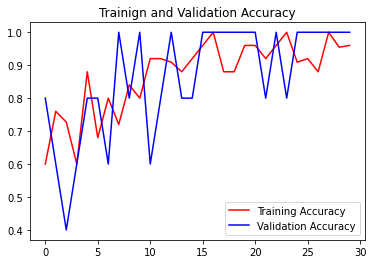

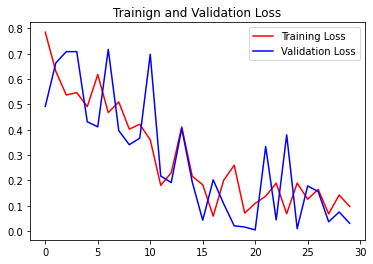

In [ ]:
# grafik akurasi

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Trainign and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Trainign and Validation Loss')
plt.legend(loc = 'best')
plt.show()
